In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assuming the CSV is properly formatted, load it directly
df = pd.read_csv("covid_19_data Updated.csv")

In [3]:
df.head()

,Observation Date,Country,Confirmed,Death,Recovered
0,1/22/2020,China,1.0,0.0,0.0
1,1/22/2020,China,14.0,0.0,0.0
2,1/22/2020,China,6.0,0.0,0.0
3,1/22/2020,China,1.0,0.0,0.0
4,1/22/2020,China,0.0,0.0,0.0


In [4]:
# Convert 'Observation Date' to datetime with multiple possible formats
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce', format='%m/%d/%Y', dayfirst=True)

# Convert other columns to numeric and handle missing values
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce').fillna(0).astype(int)
df['Death'] = pd.to_numeric(df['Death'], errors='coerce').fillna(0).astype(int)
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce').fillna(0).astype(int)

In [5]:
# Filter for the specified countries
countries_of_interest = ['China', 'India', 'Bangladesh', 'Pakistan', 'Russia', 'Indonesia', 'Japan', 'Philippines', 'Sri Lanka','Afghanistan']
df_filtered = df[df['Country'].isin(countries_of_interest)].dropna()


In [6]:
# Convert 'Observation Date' to datetime index
df_filtered.set_index('Observation Date', inplace=True)

In [7]:
# Check if there's enough data for correlation analysis
print(df_filtered[['Confirmed', 'Death', 'Recovered']].describe())

# Print the correlation matrix
print(df_filtered[['Confirmed', 'Death', 'Recovered']].corr())

          Confirmed         Death     Recovered
count  5.095500e+04  50955.000000  5.095500e+04
mean   6.253337e+04   1030.438642  5.528173e+04
std    2.335418e+05   4105.588356  2.088517e+05
min    0.000000e+00      0.000000  0.000000e+00
25%    6.540000e+02      6.000000  5.630000e+02
50%    5.582000e+03     65.000000  4.421000e+03
75%    2.911650e+04    450.000000  2.434050e+04
max    5.713215e+06  94030.000000  5.339838e+06
           Confirmed     Death  Recovered
Confirmed   1.000000  0.912900   0.996942
Death       0.912900  1.000000   0.910875
Recovered   0.996942  0.910875   1.000000


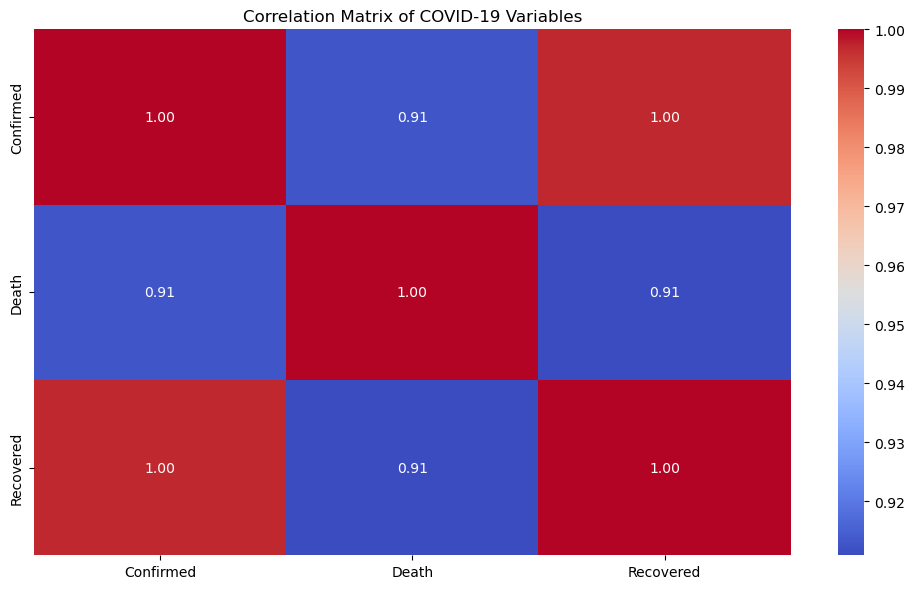

In [8]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered[['Confirmed', 'Death', 'Recovered']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Variables')
plt.tight_layout()
plt.show()

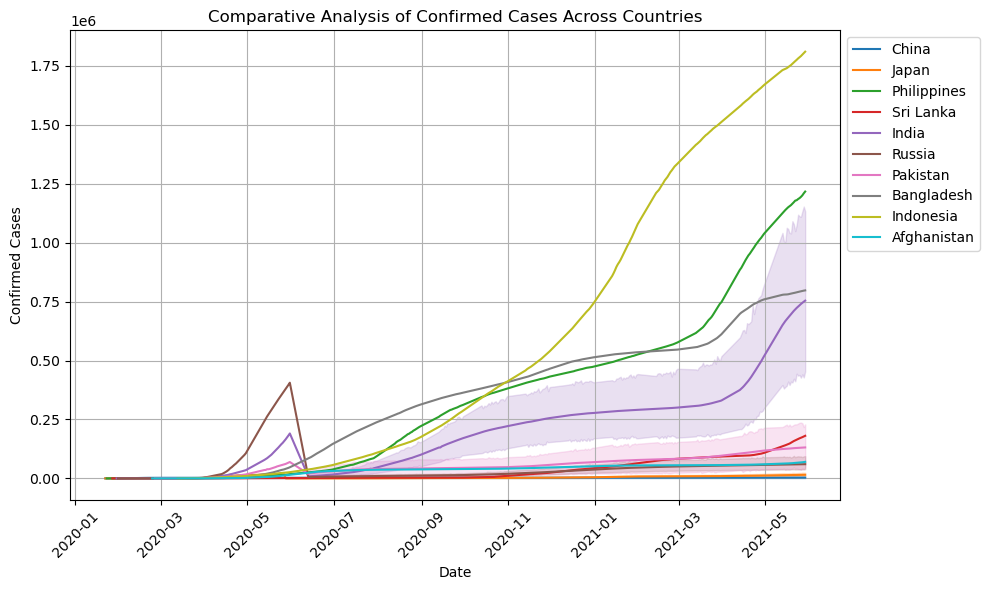

In [9]:
# Comparative Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x=df_filtered.index, y='Confirmed', hue='Country')
plt.title('Comparative Analysis of Confirmed Cases Across Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

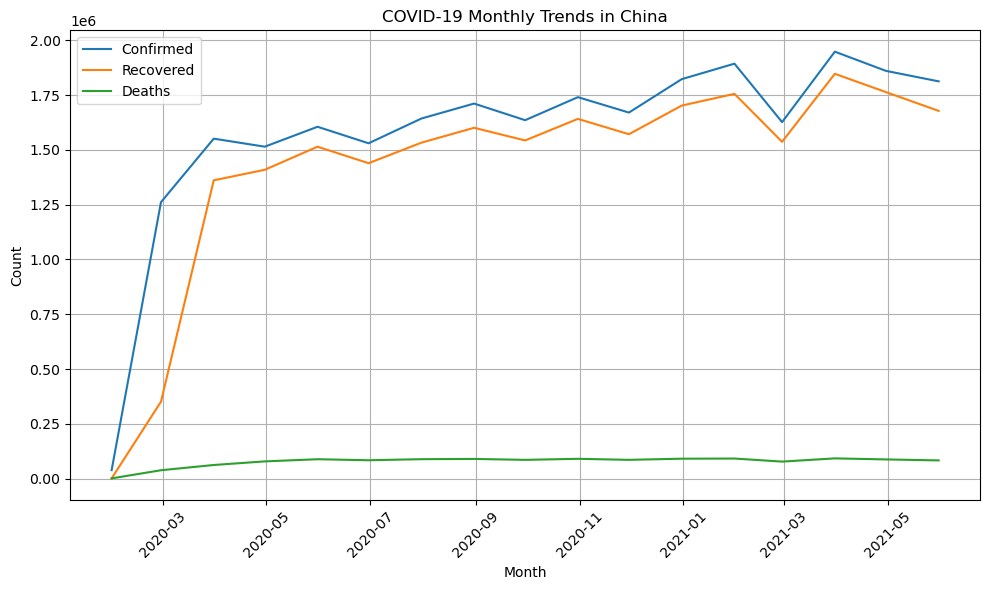

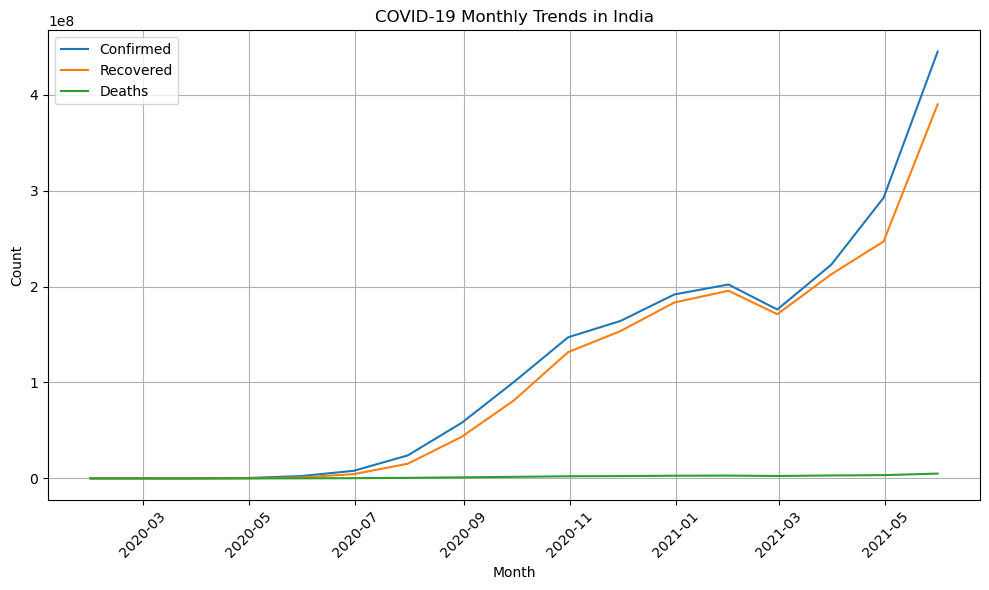

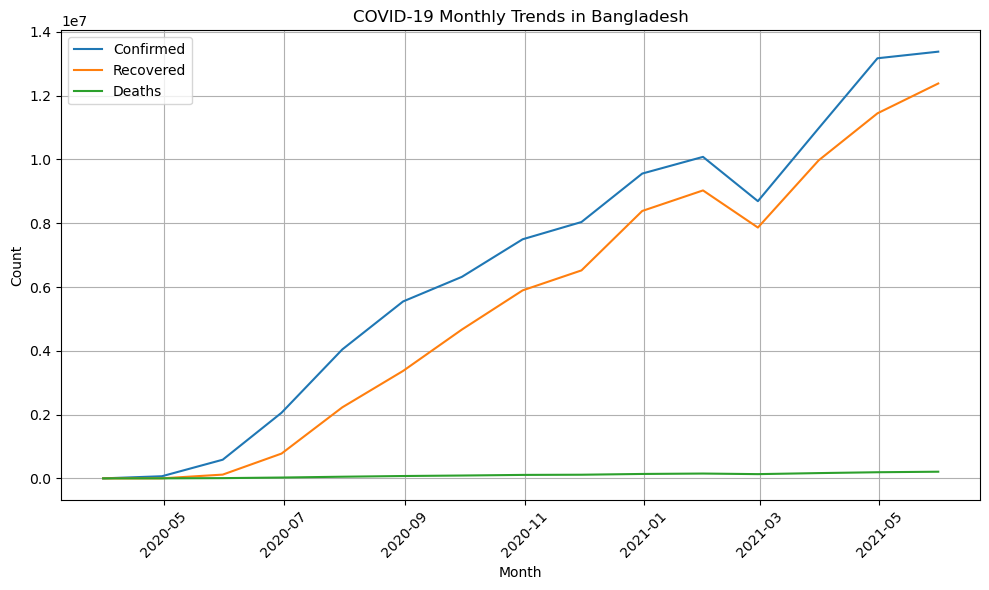

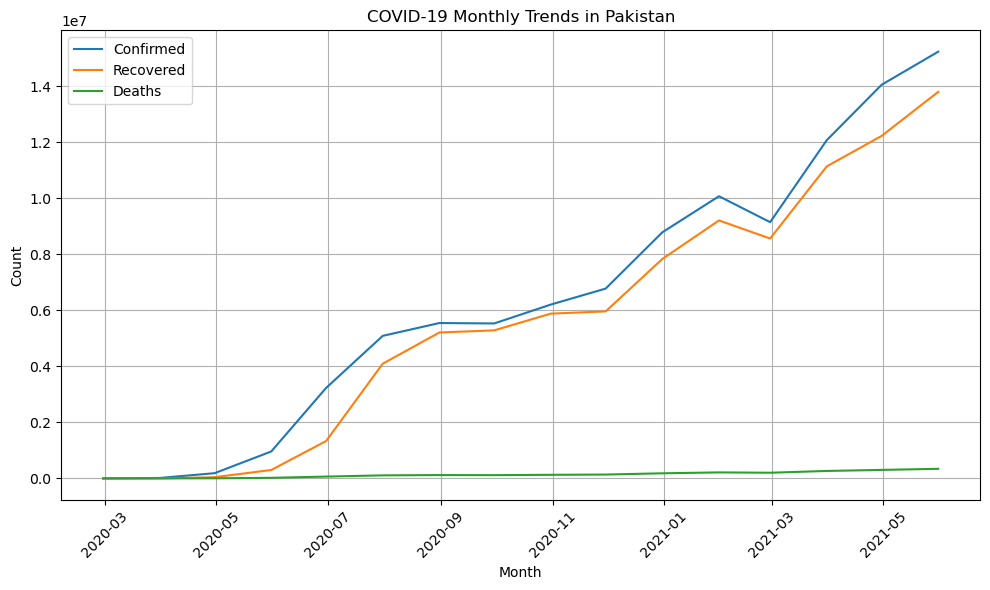

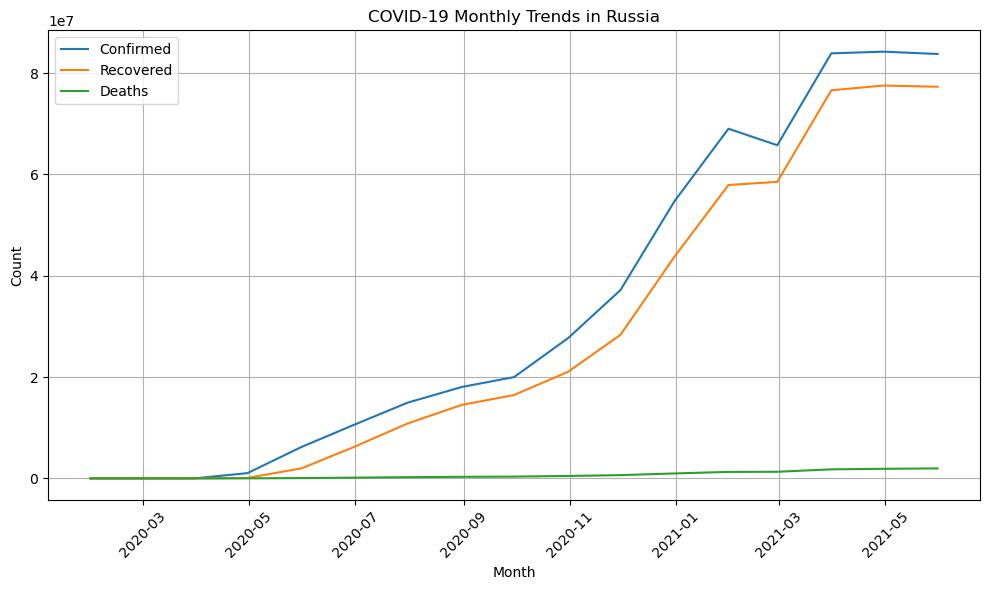

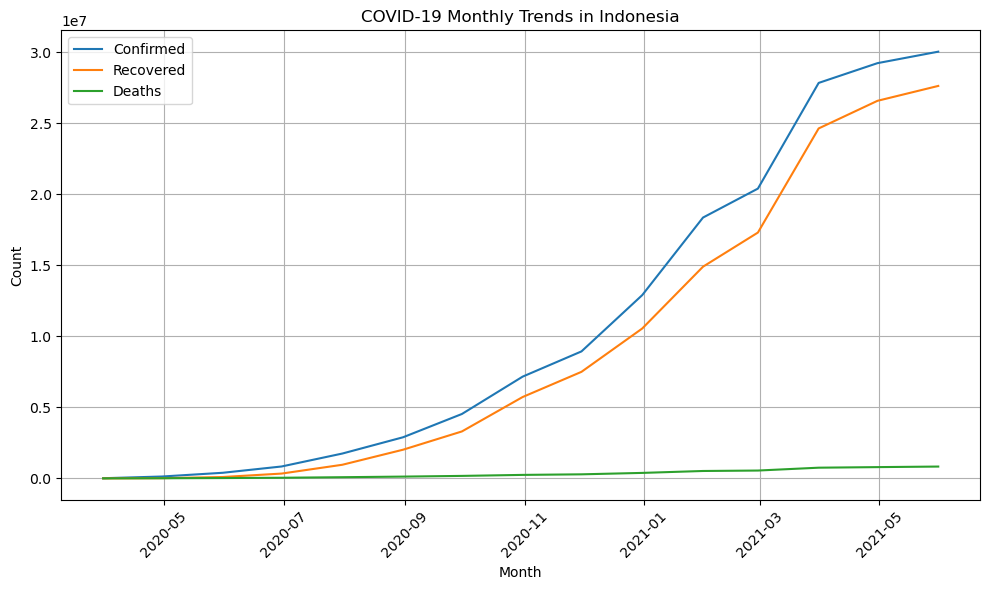

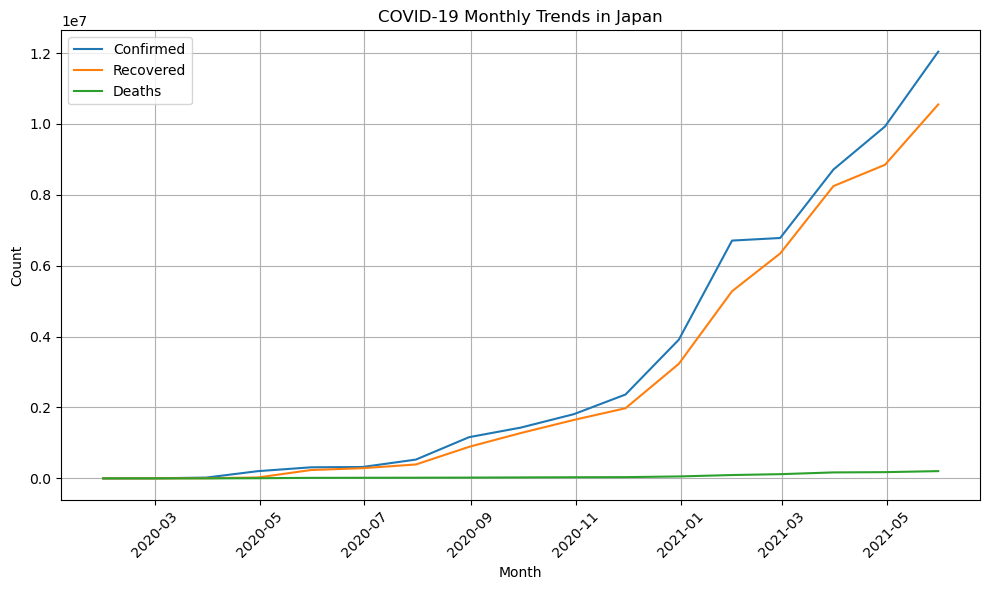

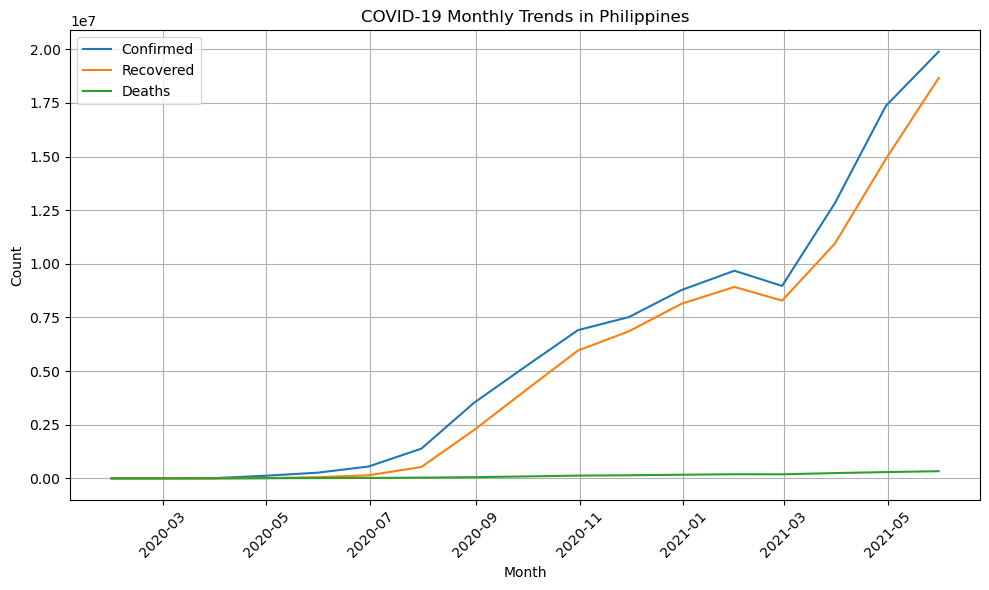

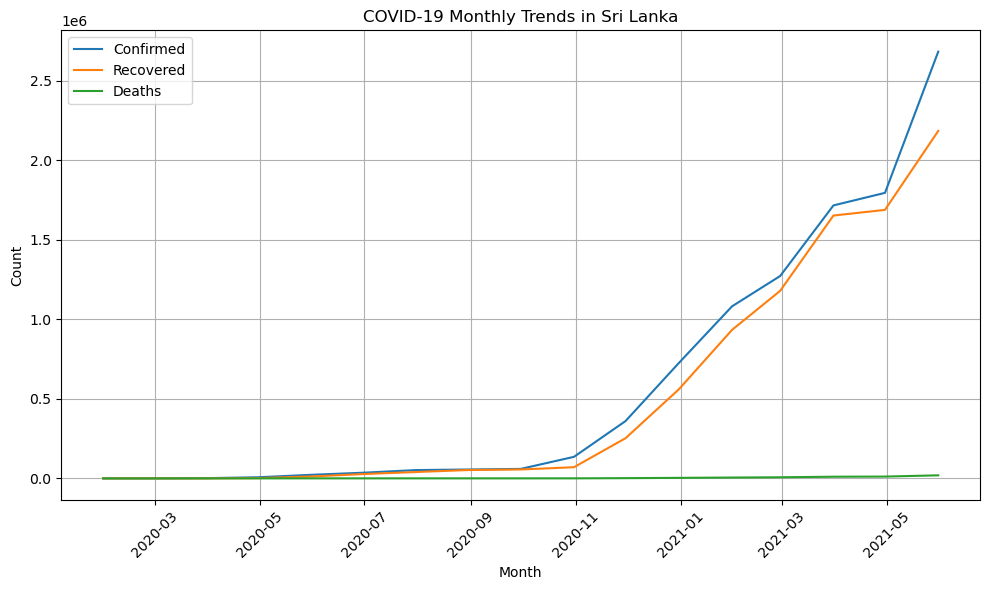

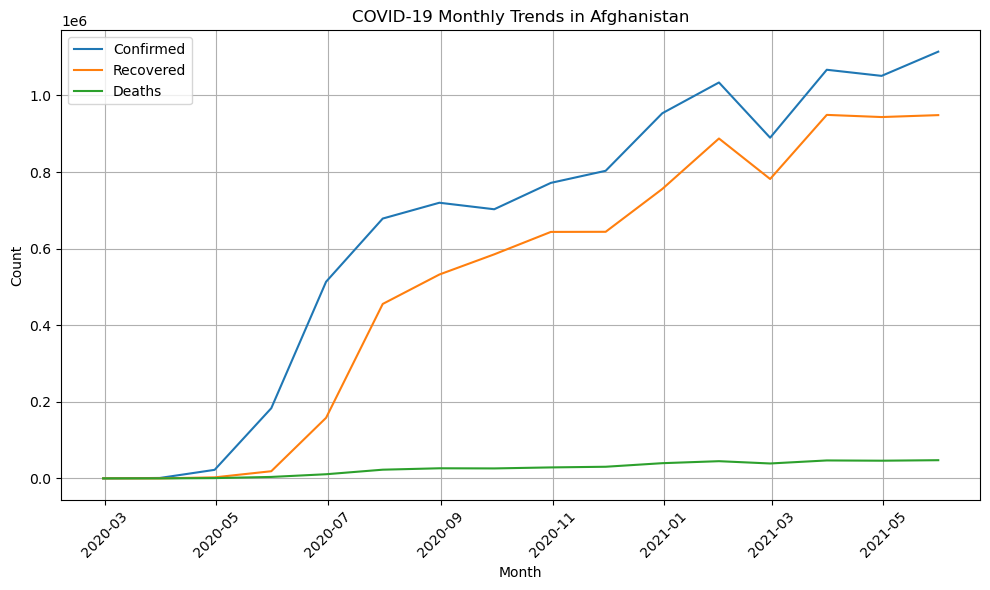

In [12]:
# Time Series Analysis
for country in countries_of_interest:
    df_country = df_filtered[df_filtered['Country'] == country].copy()

    # Resample data to monthly frequency
    df_country_monthly = df_country.resample('M').sum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_country_monthly.index, df_country_monthly['Confirmed'], label='Confirmed')
    plt.plot(df_country_monthly.index, df_country_monthly['Recovered'], label='Recovered')
    plt.plot(df_country_monthly.index, df_country_monthly['Death'], label='Deaths')
    plt.title(f'COVID-19 Monthly Trends in {country}')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [28]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

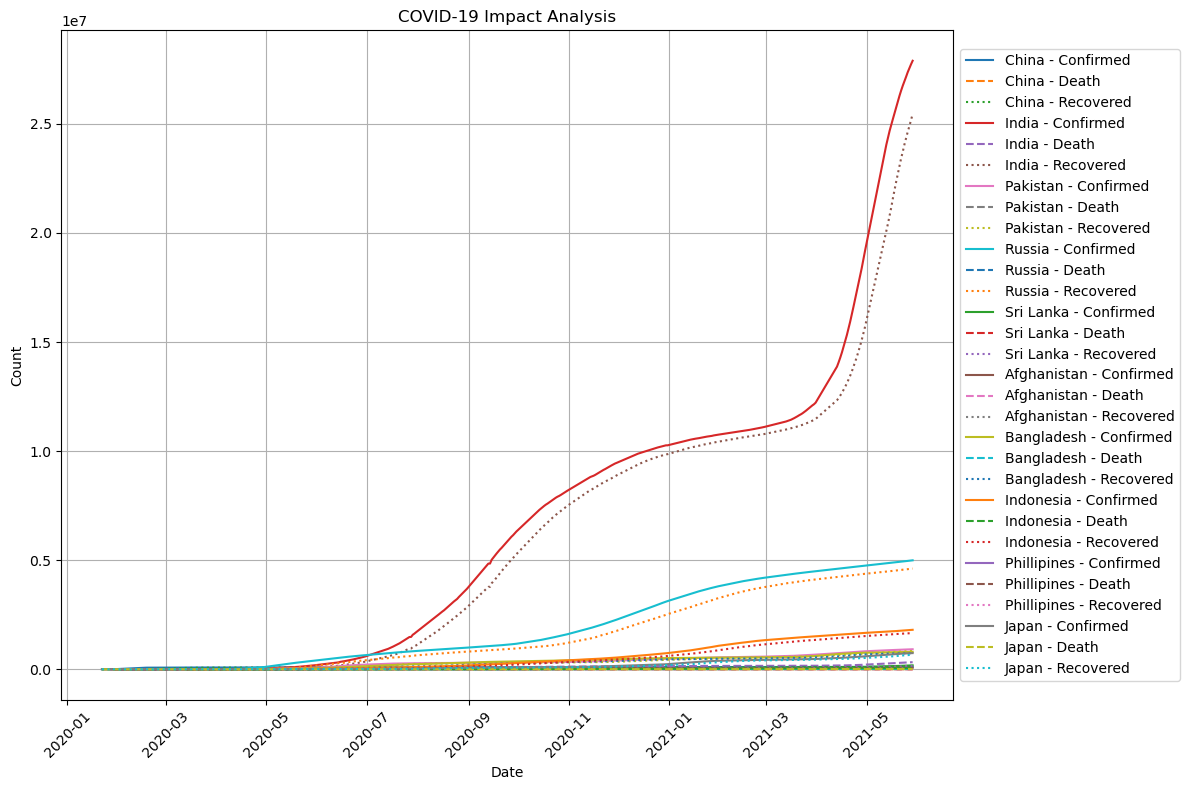

In [17]:
# Plotting trends for each country
countries_of_interest = ['China', 'India', 'Pakistan', 'Russia', 'Sri Lanka','Afghanistan','Bangladesh','Indonesia','Phillipines','Japan']  # Example countries
plt.figure(figsize=(12, 8))

for country in countries_of_interest:
    country_data = df_agg[df_agg['Country'] == country]
    plt.plot(country_data['Observation Date'], country_data['Confirmed'], label=f'{country} - Confirmed', linestyle='-')
    plt.plot(country_data['Observation Date'], country_data['Death'], label=f'{country} - Death', linestyle='--')
    plt.plot(country_data['Observation Date'], country_data['Recovered'], label=f'{country} - Recovered', linestyle=':')
    
plt.title('COVID-19 Impact Analysis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)

# Move legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()